In [71]:
# Import libaries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# PCA and data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [18]:
# Load dataset

df = pd.read_csv('UsArrests.csv')

# Check the first few rows of the DataFrame
print(df.head())

# Examine types
df.info()

         City  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


The data was checked for missing values and non were found 

In [3]:
# Check for Missing Values
print(df.isnull().sum())

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


Histograms: The histograms provide a visual representation of the distribution of each variable. They allow us to examine the data's skewness, central tendency, and spread. From the histograms, we can observe the general shape of the data and identify any potential outliers or data abnormalities.

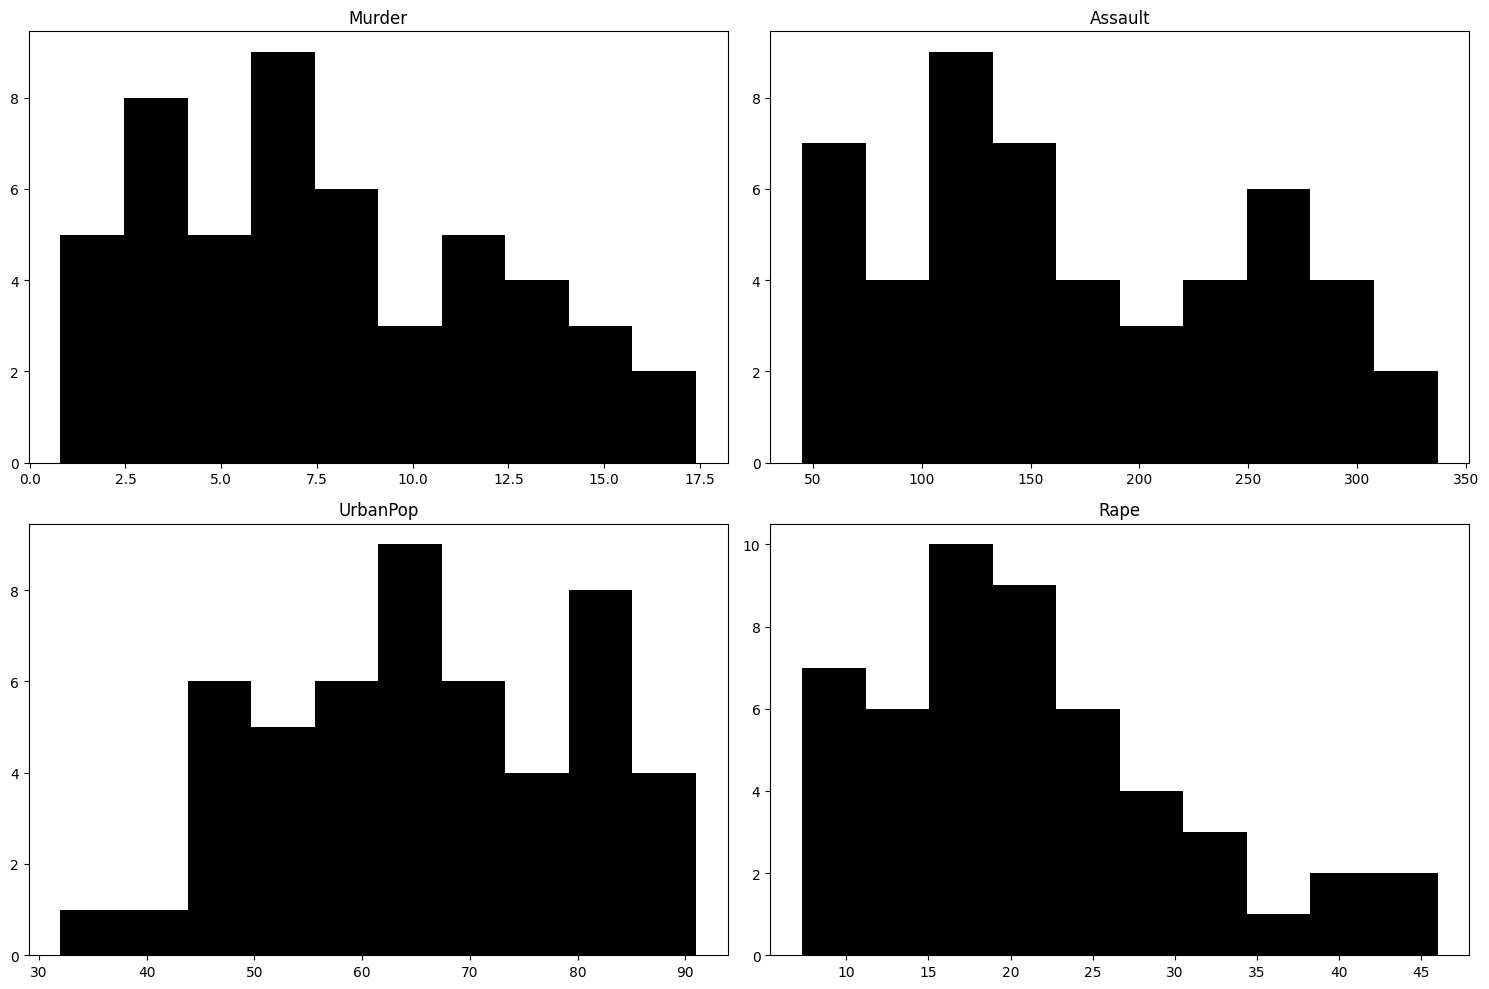

In [8]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

Correlation Heatmap: The correlation heatmap illustrates the pairwise correlations between variables. It helps us understand the relationships between variables and identify any patterns or dependencies. In this case, we can observe the correlations between the crime-related variables (Murder, Assault, and Rape) and the UrbanPop variable. The heatmap assists in identifying the degree and direction of the relationships.

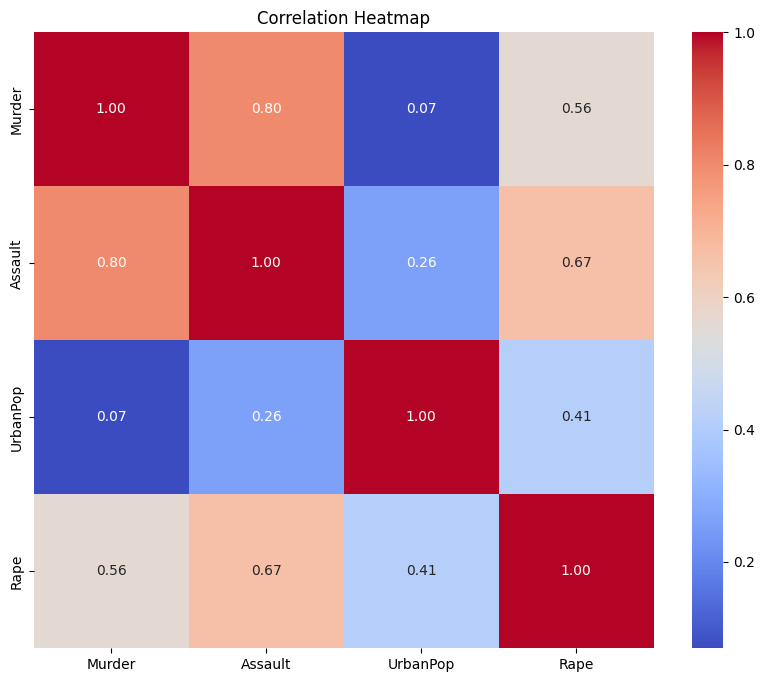

In [9]:
# Calculate correlation matrix
corr_matrix = df.iloc[:,1:].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

plt.title('Correlation Heatmap')
plt.show()

Standardization: Standardizing the data using StandardScaler() ensures that all variables have a mean of 0 and a standard deviation of 1. This step is necessary for PCA, as it ensures that all variables are on the same scale and prevents variables with larger magnitudes from dominating the analysis. The standardized data is stored in the df_std DataFrame.

In [13]:
# Standardize the Data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]), columns = df.columns[1:], index = df.iloc[:,0])


# Exclude the "City" column and standardize the rest of the dataframe
df_std = scaler.fit_transform(df.drop('City', axis=1))
print(df_scaled.head())

              Murder   Assault  UrbanPop      Rape
City                                              
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814


PCA: The PCA is performed using the PCA() class from scikit-learn. The PCA model is fitted to the standardized data using fit(), and then the dimensionality reduction is applied to the standardized data using transform(). The resulting transformed data is stored in the df_pca DataFrame

In [14]:
# Apply PCA
pca = PCA()  # create a PCA object
pca.fit(df_std)  # fit the PCA model to the data
df_pca = pca.transform(df_std)  # apply the dimensionality reduction on df_std

The "Explained variance ratio" shows how much of the total variance in the data is explained by each principal component. PC1 explains about 62.01% of the variance, PC2 explains around 24.74%, PC3 explains about 8.91%, and PC4 explains roughly 4.34%. PC1 and PC2 together explain around 86.75% of the variance, indicating they capture a significant portion of the information. Retaining fewer components that explain a large proportion of the variance simplifies the analysis while preserving most of the important information.





In [15]:
# Interpret the results
print("Explained variance ratio: ", pca.explained_variance_ratio_)

Explained variance ratio:  [0.62006039 0.24744129 0.0891408  0.04335752]


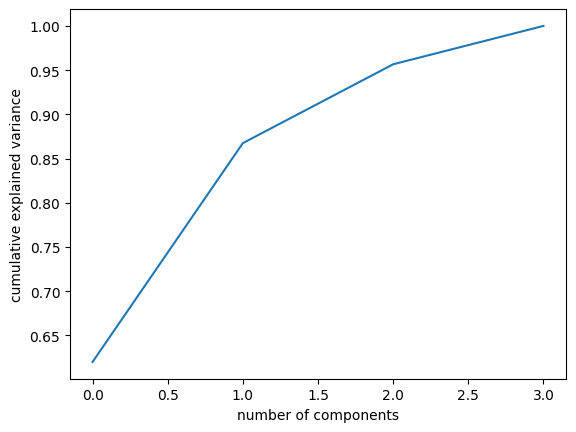

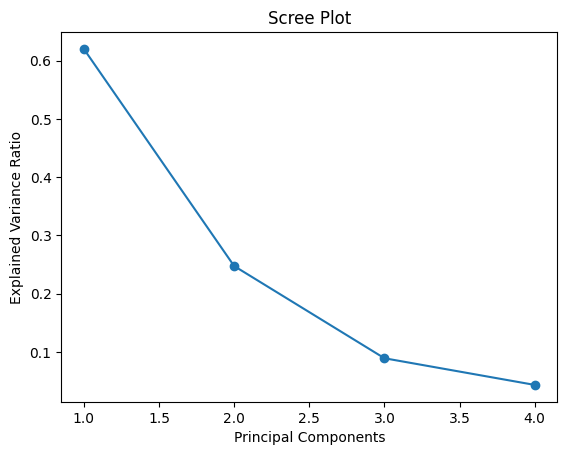

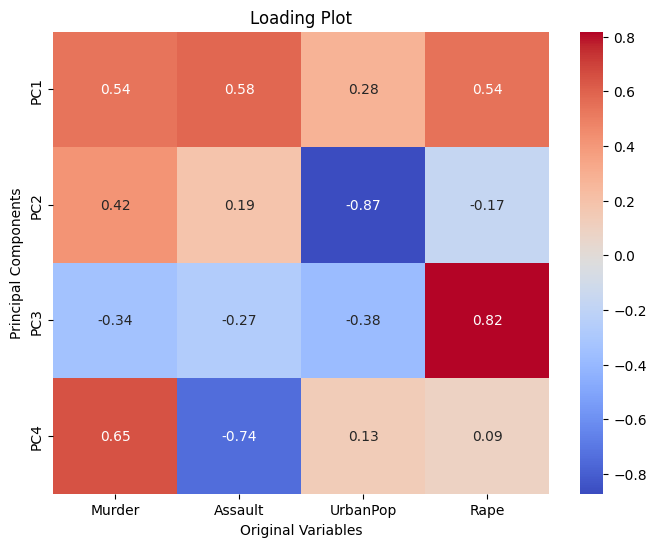

Loadings:
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


In [21]:
# Visualize the explained variance by each component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


# Generate the loading plot
plt.figure(figsize=(8, 6))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt=".2f",
            xticklabels=df.columns[1:], yticklabels=["PC1", "PC2", "PC3", "PC4"])
plt.xlabel('Original Variables')
plt.ylabel('Principal Components')
plt.title('Loading Plot')
plt.show()
loadings = pca.components_
print("Loadings:")
print(loadings)

In [22]:
# Apply PCA with 2 components
pca = PCA(n_components=2)  # create a PCA object with 2 components
pca.fit(df_std)  # fit the PCA model to the standardized data
df_pca = pca.transform(df_std)  # transform the standardized data using the first two components

# Interpret the results
print("Explained variance ratio: ", pca.explained_variance_ratio_)


Explained variance ratio:  [0.62006039 0.24744129]


After performing Principal Component Analysis (PCA) on the standardized data, the "Explained variance ratio" provides information about the proportion of variance explained by each principal component. In this case, the first principal component (PC1) explains about 62.01% of the total variance, while the second principal component (PC2) explains approximately 24.74% of the variance. These two components combined explain around 86.75% of the total variance.

By retaining the first two principal components, we capture a significant amount of the information present in the original dataset while reducing its dimensionality. This simplification allows for easier interpretation and analysis while still preserving most of the important patterns and relationships in the data.

In [45]:
# Standardize the Data
scaler = StandardScaler()
df_std = scaler.fit_transform(df.drop('City', axis=1))  # Exclude the "City" column and standardize the rest of the dataframe

We used two methods, the silhouette method and elbow method, to determine the optimal number of clusters. By analyzing the results, we found that 4 clusters provided the best fit for the data.

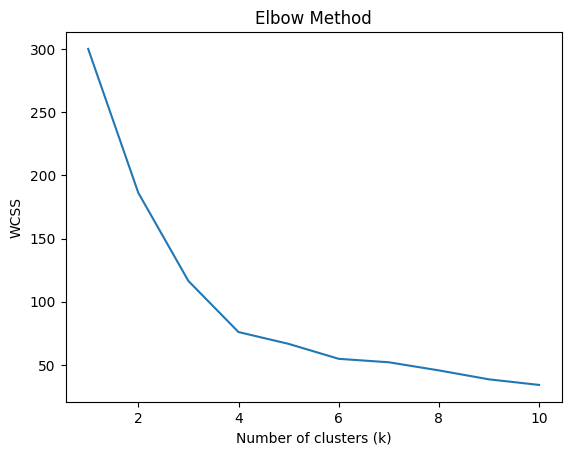

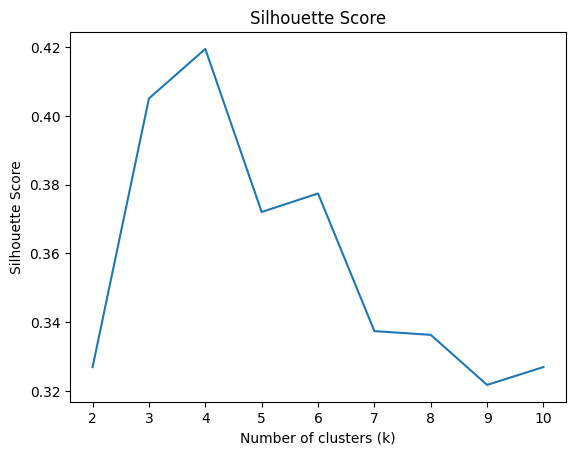

In [72]:
# Elbow method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(k_values, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_std)
    labels = kmeans.labels_
    score = silhouette_score(df_std, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


Single Dendrogram: The single dendrogram uses the single linkage method, which measures the minimum distance between clusters. It tends to create long and extended clusters, making it more sensitive to outliers. However, in this specific case, the single dendrogram did not produce any clear separation or distinct clusters. 

Average Dendrogram: The average dendrogram uses the average linkage method, which calculates the average distance between clusters. It provides a balanced approach and is less sensitive to outliers. The average dendrogram shows a clearer separation of the data points into distinct clusters compared to the single dendrogram.

Complete Dendrogram: The complete dendrogram uses the complete linkage method, which measures the maximum distance between clusters. It tends to create compact and tight clusters. The complete dendrogram shows a well-defined separation of the data points into distinct clusters

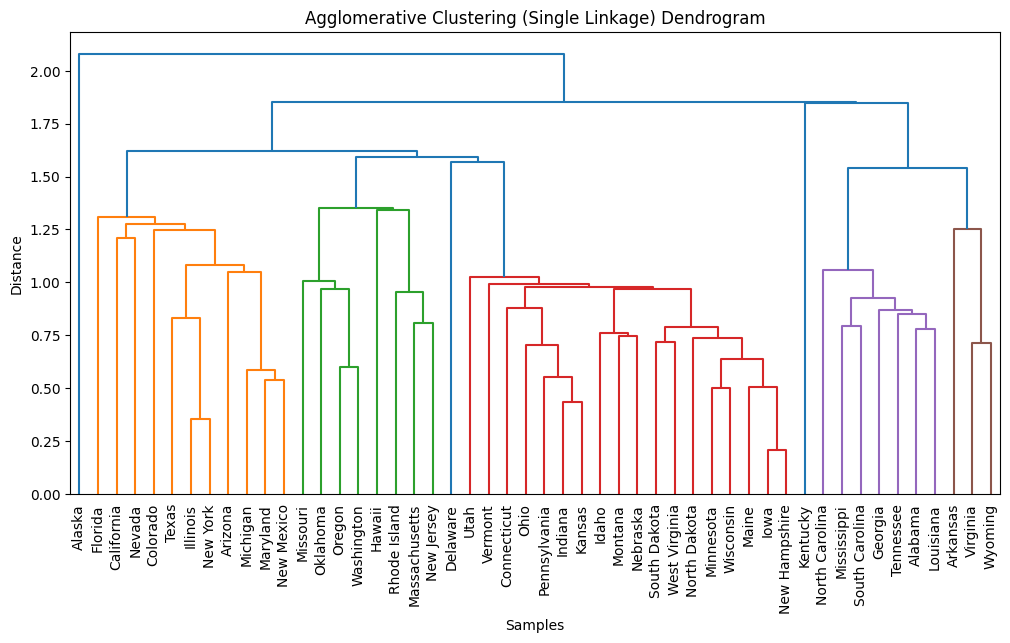

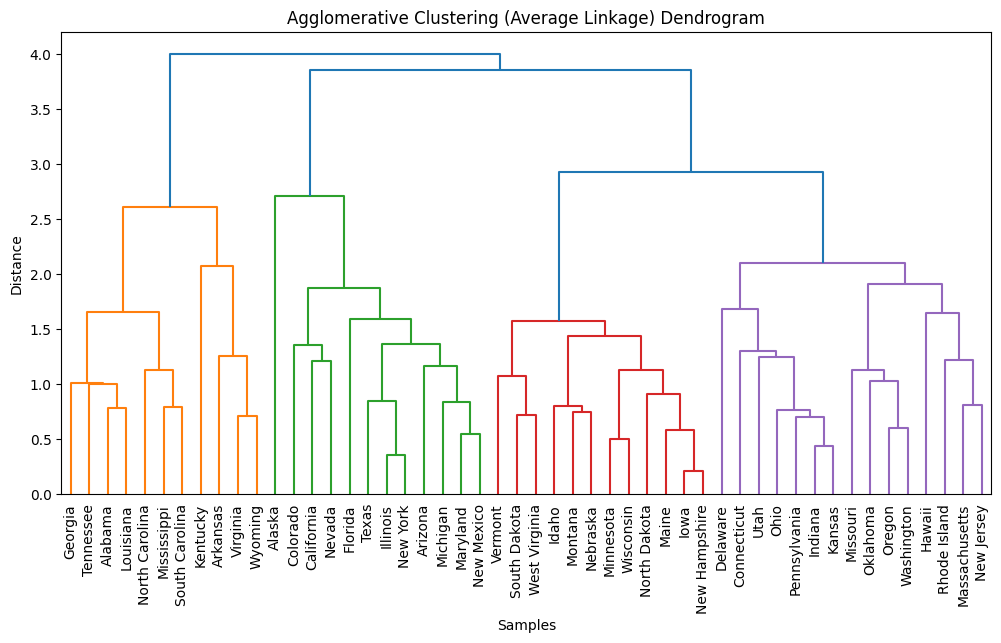

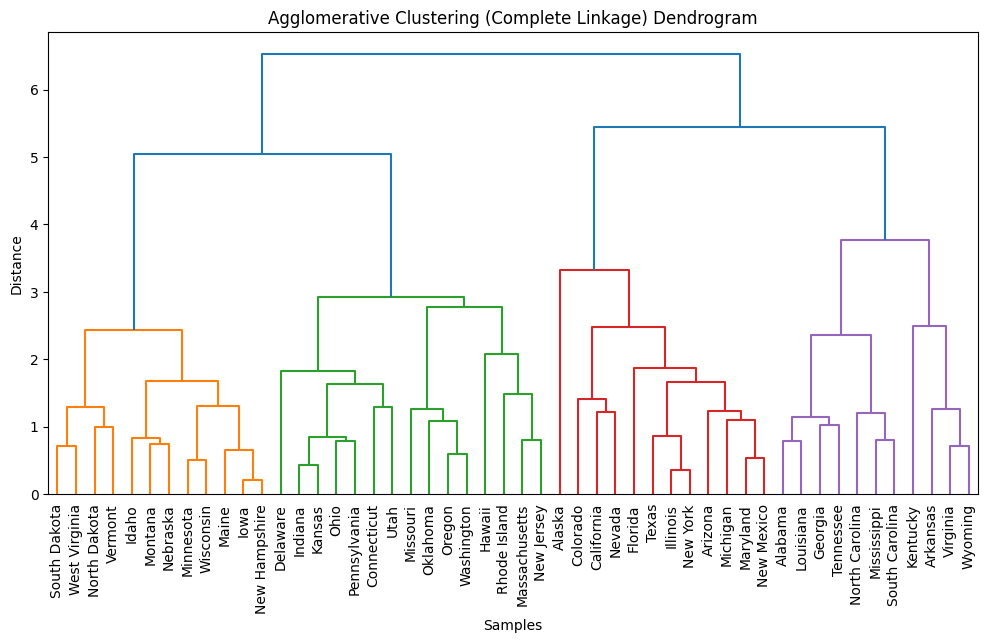

In [67]:
# Perform Agglomerative clustering with single linkage
agg_single = AgglomerativeClustering(n_clusters=4, linkage='single')
agg_single.fit(df_std)

# Perform Agglomerative clustering with average linkage
agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_average.fit(df_std)

# Perform Agglomerative clustering with complete linkage
agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
agg_complete.fit(df_std)

# Plot dendrogram for Agglomerative clustering with single linkage
plt.figure(figsize=(12, 6))
plt.title('Agglomerative Clustering (Single Linkage) Dendrogram')
dendrogram(linkage(df_std, method='single'), labels=df['City'].values, leaf_font_size=10)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for Agglomerative clustering with average linkage
plt.figure(figsize=(12, 6))
plt.title('Agglomerative Clustering (Average Linkage) Dendrogram')
dendrogram(linkage(df_std, method='average'), labels=df['City'].values, leaf_font_size=10)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for Agglomerative clustering with complete linkage
plt.figure(figsize=(12, 6))
plt.title('Agglomerative Clustering (Complete Linkage) Dendrogram')
dendrogram(linkage(df_std, method='complete'), labels=df['City'].values, leaf_font_size=10)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Cluster 0:

Cluster Size: 15
Characteristics: This cluster has relatively higher values for Murder, Assault, and Rape compared to the other clusters. It suggests that the states in this cluster have higher crime rates.
Cluster 1:

Cluster Size: 10
Characteristics: This cluster has relatively lower values for all features compared to the other clusters. It indicates that the states in this cluster generally have lower crime rates and lower urban population.
Cluster 2:

Cluster Size: 13
Characteristics: This cluster has relatively lower values for Murder, Assault, and Rape. However, it has a slightly higher value for UrbanPop compared to the other clusters. It suggests that the states in this cluster have moderate crime rates and a relatively higher urban population.
Cluster 3:

Cluster Size: 12
Characteristics: This cluster has relatively higher values for Assault and UrbanPop, but lower values for Murder and Rape. It suggests that the states in this cluster have a moderate level of crime, with a higher urban population.

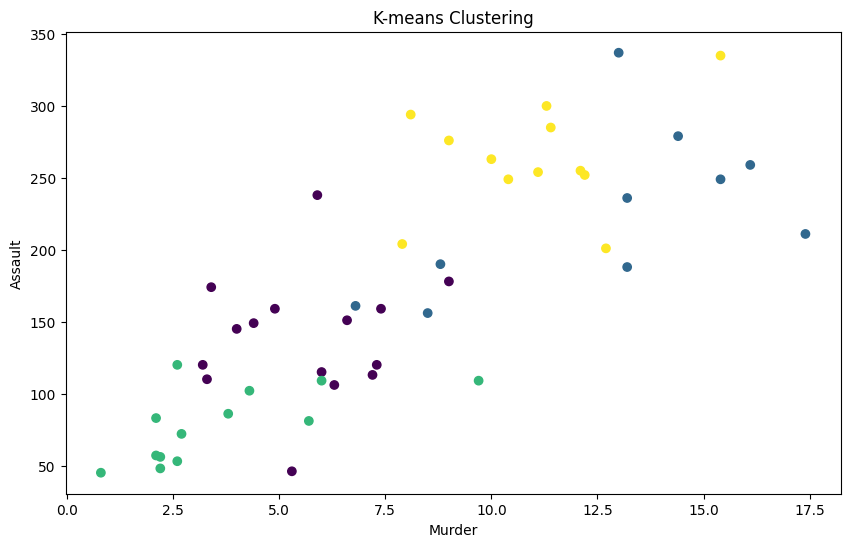

In [68]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_std)

# Add the K-means clustering labels to the DataFrame
df['KMeans Cluster'] = kmeans.labels_

# Visualize the clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Murder'], df['Assault'], c=df['KMeans Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [70]:
# Print cluster sizes
cluster_sizes = np.bincount(kmeans.labels_)
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
[15 10 13 12]


In summary, the analysis of the given data using PCA and clustering techniques revealed interesting patterns and groupings. The Principal Component Analysis (PCA) helped reduce the dataset's dimensionality while retaining important information. The clustering techniques, including KMeans and Agglomerative clustering, identified distinct clusters with different characteristics based on the variables in the data. By examining the cluster centers and sizes, we gained insights into the average values and number of data points within each cluster. These findings provide a deeper understanding of the relationships and similarities among the states in the dataset.



